Chapter 13: Statistics

In [5]:
!pip install statsmodels

In [6]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

In [7]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [8]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    Parameters
    ==========
    S0: float
    initial stock/index value
    r: float
    constant short rate
    sigma: float
    constant volatility
    T: float
    final time horizon
    M: int
    number of time steps/intervals
    I: int
    number of paths to be simulated
    Returns
    =======
    paths: ndarray, shape (M + 1, I)
    simulated paths given the parameters
    '''
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std() #Matching first and second moment
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
            sigma * math.sqrt(dt) * rand)         #Vectorized Euler discretization of geometric Brownian motion.
    return paths

In [9]:
S0 = 100. # Initial value for simulated processe
r = 0.05 # Constant short rate
sigma = 0.2 # Constant volatility factor
T = 1.0 # Time horizon in year fractions
M = 50 # Number of time intervals
I = 250000 # Number of simulated processes
np.random.seed(1000)

In [10]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [11]:
S0 * math.exp(r * T) # Expected value and average simulated value

105.12710963760242

In [12]:
paths[-1].mean()

np.float64(105.12645392478754)

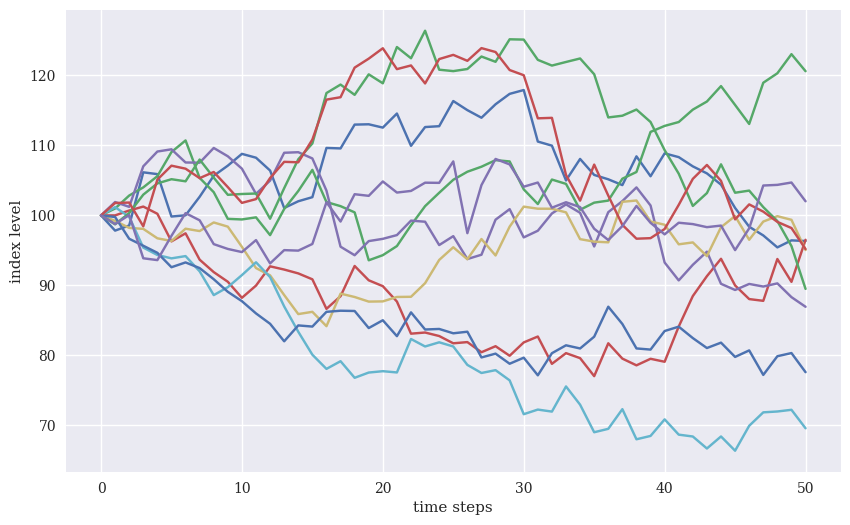

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level');

Figure 13-1. Ten simulated paths of geometric Brownian motion

In [14]:
paths[:,0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [15]:
log_returns = np.log(paths[1:]/paths[:-1])

In [16]:
log_returns[:,0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [17]:
def print_statistics(array):
    ''' Prints selected statistics.
Parameters
==========
array: ndarray
object to generate statistics on
'''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [18]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


In [19]:
# Annealized mean log return after correction for the Ito term
log_returns.mean()*M + 0.5*sigma**2

np.float64(0.05000000000000004)

In [20]:
# Annualized volatility; i.e., annualized standard deviation of log returns
log_returns.std()*math.sqrt(M)

np.float64(0.2)

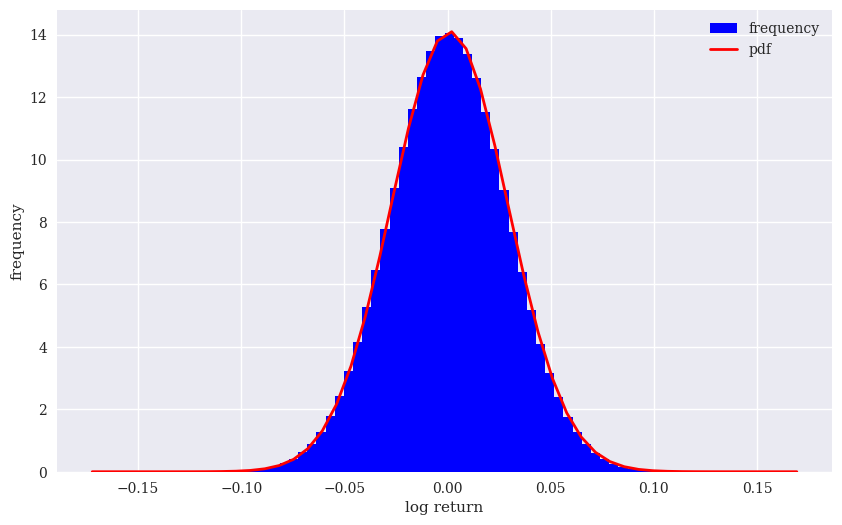

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True,
label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),'r', lw=2.0, label='pdf')
plt.legend();

Figure 13-2. Histogram of log returns of geometric Brownina motion and normal density function.

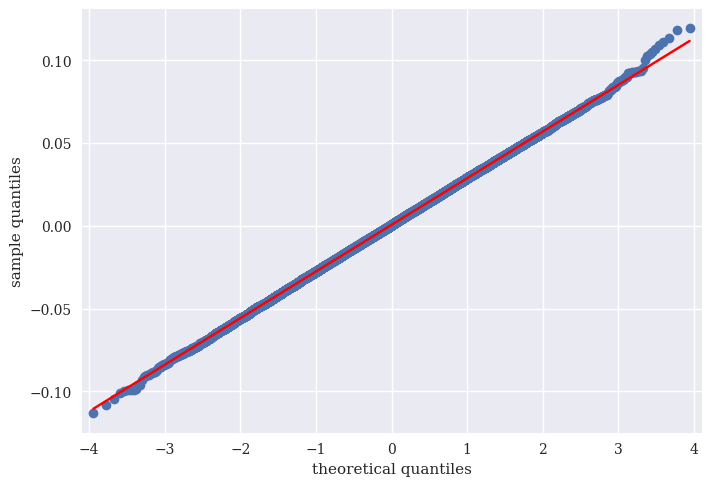

In [22]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

Figure 13-3. Quantile-quantile plot for log returns of geometric Brownian motion

In [23]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
Parameters
==========
array: ndarray
object to generate statistics on
'''
    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [24]:
normality_tests(log_returns.flatten())
# All p values are well above 0.05.

Skew of data set          0.001
Skew test p-value          0.430
Kurt of data set          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


Text(0.5, 1.0, 'log data')

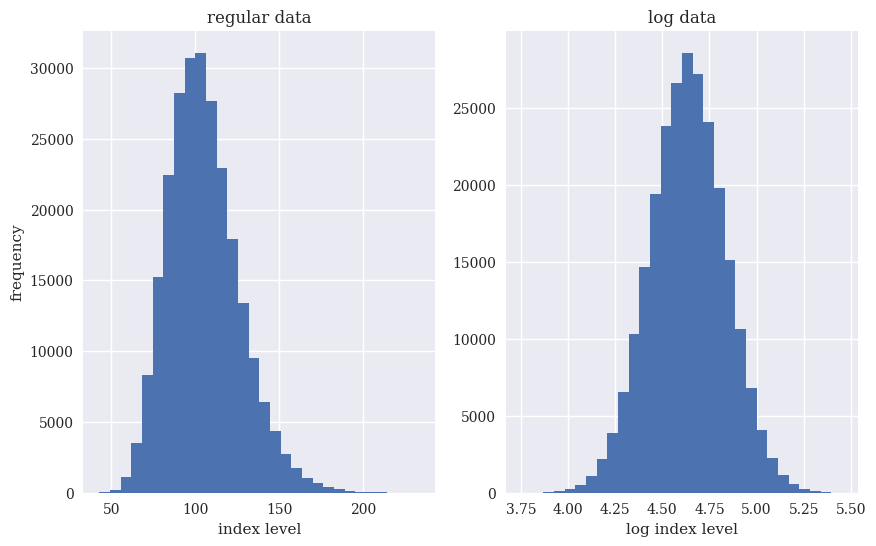

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

Figure 13-4. Histogram of simulated end-of-period index levels for geometric Brownian motion

In [26]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [27]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [28]:
normality_tests(np.log(paths[-1]))

Skew of data set         -0.001
Skew test p-value          0.851
Kurt of data set         -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


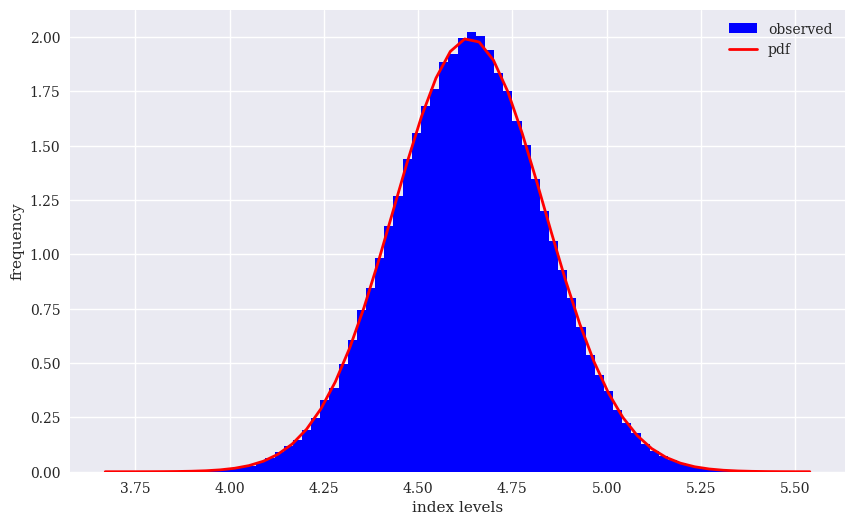

In [29]:
plt.figure(figsize=(10, 6))
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True,
label='observed', color='b')
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
'r', lw=2.0, label='pdf')
plt.legend();

Figure 13-5. Histogram of log index levels of geometric Brownian motion and normal density function

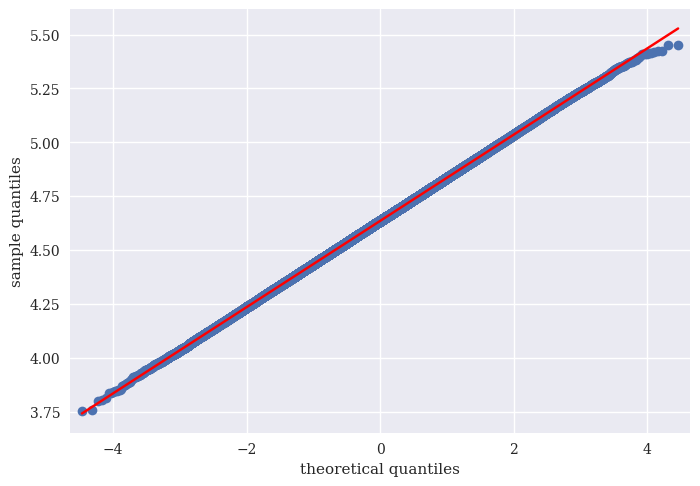

In [30]:
sm.qqplot(log_data, line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

Figure 13-6. Quantile-quantile plot for log index levels of geometric Brownian motion

In [31]:
import pandas as pd

In [32]:
raw = pd.read_csv('tr_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [46]:
symbols = ['SPY', 'GLD','AAPL.O','MSFT.O']

In [47]:
data=raw[symbols]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2138 non-null   float64
 1   GLD     2138 non-null   float64
 2   AAPL.O  2138 non-null   float64
 3   MSFT.O  2138 non-null   float64
dtypes: float64(4)
memory usage: 83.5 KB


In [49]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


<Axes: xlabel='Date'>

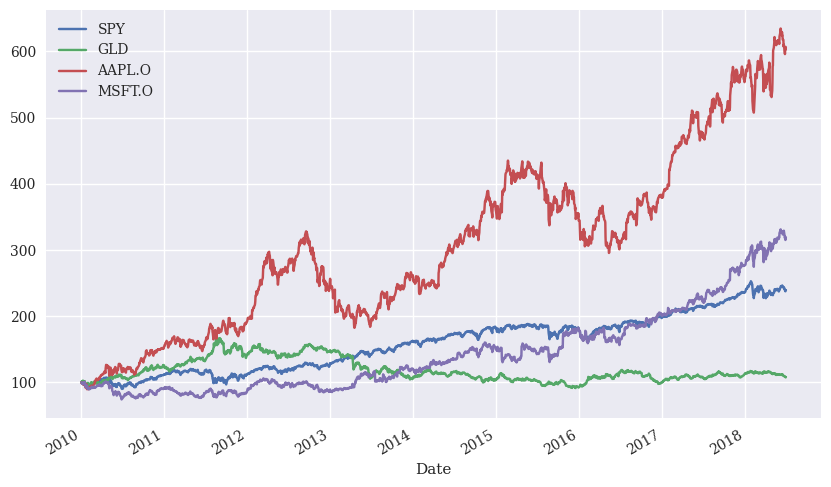

In [50]:
(data/data.iloc[0]*100).plot(figsize=(10,6))

Figure 13-7. Normalized prices of financial instruments over time


In [51]:
log_returns = np.log(data/data.shift(1))
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


array([[<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>]], dtype=object)

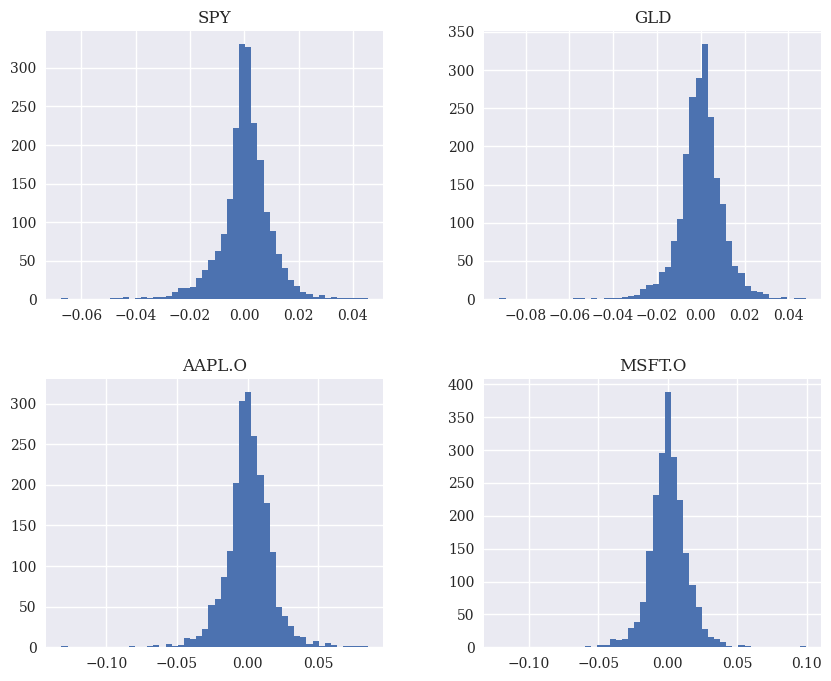

In [52]:
log_returns.hist(bins=50, figsize=(10,8))

13-8. Histograms of log returns for financial instruments

In [55]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30*'-/')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SPY
-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/
     statistic           value
------------------------------
          size      2137.00000
           min        -0.06734
           max         0.04545
          mean         0.00041
           std         0.00933
          skew        -0.52189
      kurtosis         4.52432

Results for symbol GLD
-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/
     statistic           value
------------------------------
          size      2137.00000
           min        -0.09191
           max         0.04795
          mean         0.00004
           std         0.01020
          skew        -0.59934
      kurtosis         5.68423

Results for symbol AAPL.O
-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/-/
     statistic           value
------------------------------
          size      2137.00000
           min        -0.13187
           max         0.08502
          mean         0.0008

Text(0, 0.5, 'sample quantiles')

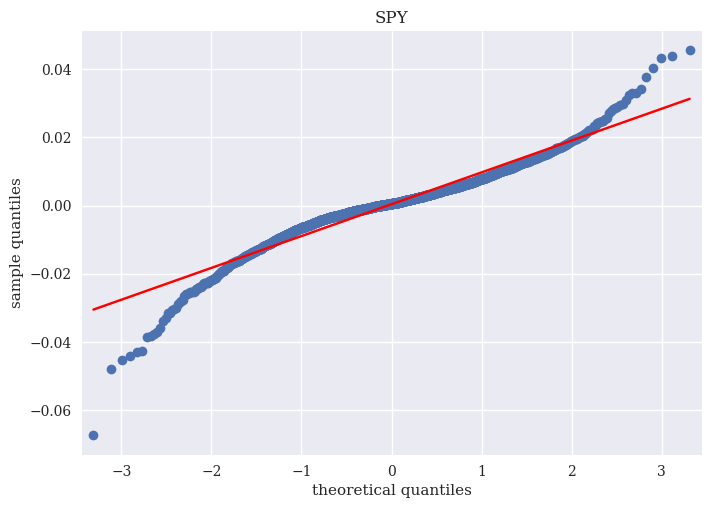

In [56]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Figure 13-9. Quantile-quantile plot for SPY log returns


Text(0, 0.5, 'sample quantiles')

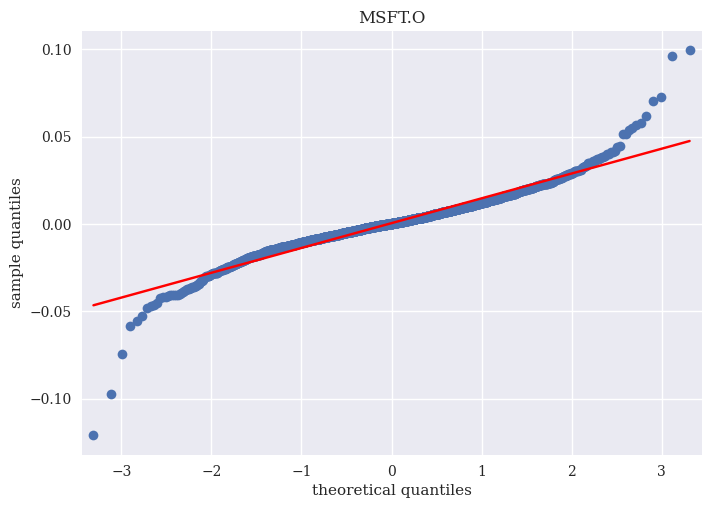

In [57]:
sm.qqplot(log_returns['MSFT.O'].dropna(), line='s')
plt.title('MSFT.O')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Figure 13-10. Quantile-quantile plot for MSFT.O log returns

In [ ]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32*'-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data) # Normality test results for the times series of the financial instruments.
    


Results for symbol SPY
--------------------------------
Skew of data set         -0.522
Skew test p-value          0.000
Kurt of data set          4.524
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set         -0.599
Skew test p-value          0.000
Kurt of data set          5.684
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL.O
--------------------------------
Skew of data set         -0.235
Skew test p-value          0.000
Kurt of data set          4.790
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT.O
--------------------------------
Skew of data set         -0.091
Skew test p-value          0.085
Kurt of data set          7.291
Kurt test p-value          0.000
Norm test p-value          0.000


In [59]:
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD'] 

In [60]:
noa = len(symbols)

In [61]:
data = raw[symbols]

In [62]:
rets = np.log(data / data.shift(1))

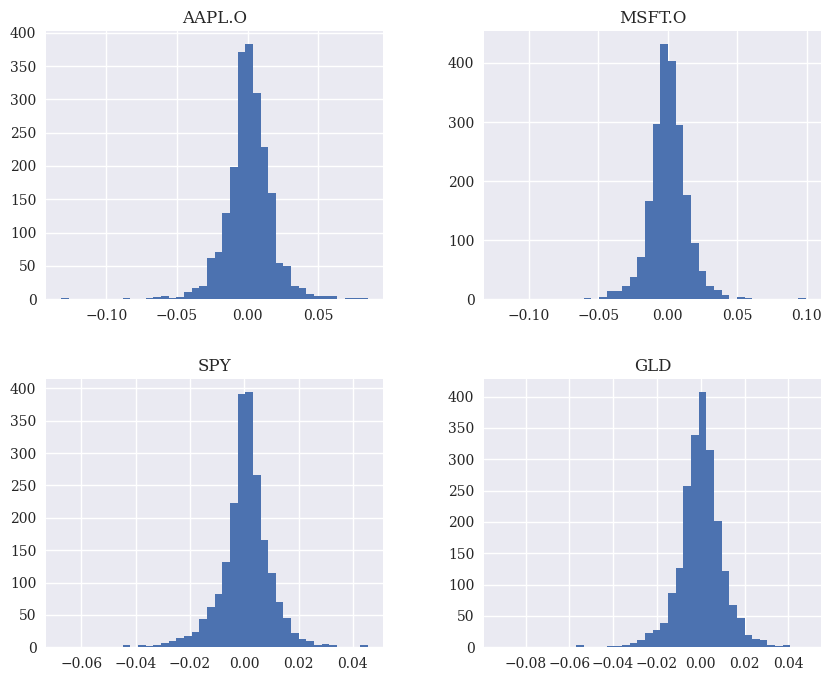

In [63]:
rets.hist(bins=40, figsize=(10, 8));

Figure 13-11. Histograms of log returns of financial instruments

In [ ]:
rets.mean()*252
# Annualized mean returns

AAPL.O    0.212359
MSFT.O    0.136648
SPY       0.102928
GLD       0.009141
dtype: float64

In [ ]:
rets.cov()*252
# annualized covariance matrix

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.063773,0.023427,0.021039,0.001513
MSFT.O,0.023427,0.050917,0.022244,-0.000347
SPY,0.021039,0.022244,0.021939,0.000062
GLD,0.001513,-0.000347,0.000062,0.026209


In [ ]:
weights = np.random.random(noa) # random portfolio weigths
weights /= np.sum(weights) # normalized to 1 or 100%

In [65]:
weights

array([0.07650728, 0.06021919, 0.63364218, 0.22963135])

In [66]:
weights.sum()

np.float64(1.0)

In [ ]:
np.sum(rets.mean()*weights)*252
# Annealized portfolio return given the portfolio weights

np.float64(0.09179459482057789)

In [ ]:
np.dot(weights.T, np.dot(rets.cov()*252, weights))
# Annualized protfolio variance given the portfolio weigths

np.float64(0.014763288666485568)

In [ ]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov()*252, weights)))
# Annualized protfolio volatility given the portfolio weigths

0.1215042742724945

In [73]:
def port_ret(weights):
    return np.sum(rets.mean()*weights)*252

In [74]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov()*252, weights)))

In [ ]:
prets = []
pvols = []
for p in range (2500): # MC simulation of portfolio wieghts
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights)) # collects the resulting statiscitcs in list ojbects
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols) 

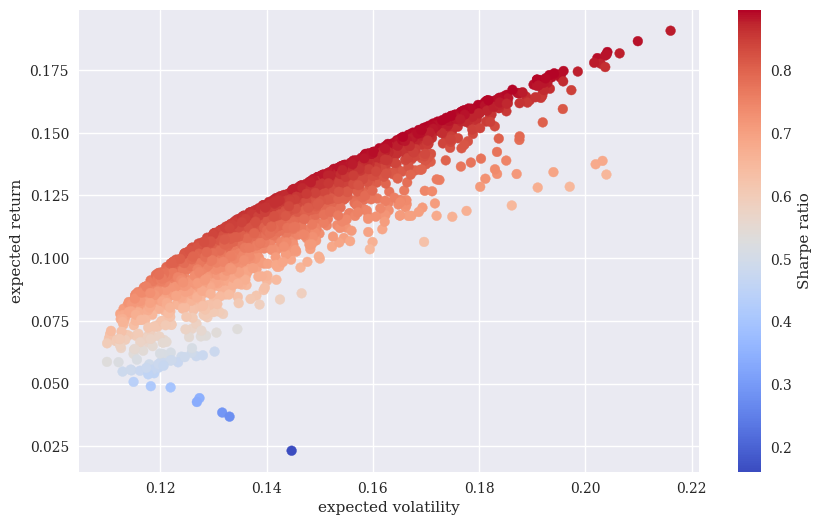

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

Figure 13-12. Expected return and volatility for random portfolio weights